<a href="https://colab.research.google.com/github/Hafeez1002/Channel-Flow/blob/main/20251021_First_EDAA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set font for labels in coming figures
font4 = {'family': 'sans-serif',
          'color':  'black',
          'weight': 'normal',
          'size': 4,
          }

# Set font for labels in coming figures
font8 = {'family': 'sans-serif',
          'color':  'black',
          'weight': 'normal',
          'size': 8,
          }

# Set font for labels in coming figures
font10 = {'family': 'sans-serif',
          'color':  'black',
          'weight': 'normal',
          'size': 10,
          }

# Set font for labels in coming figures
font12 = {'family': 'sans-serif',
          'color':  'black',
          'weight': 'normal',
          'size': 12,
          }

# Set font for labels in coming figures
font16 = {'family': 'sans-serif',
          'color':  'black',
          'weight': 'normal',
          'size': 16,
          }

# Set font for labels in coming figures
font20 = {'family': 'sans-serif',
          'color':  'black',
          'weight': 'normal',
          'size': 20,
          }

In [ ]:
## Analysis


## Paths
#rawpath         = '/content/FarmData.csv'
lekancalibpath  = '/content/drive/MyDrive/Y4/QCES/EDAA/lab_ref_co2_091025_121025.csv'
ourcalibpath    = '/content/drive/MyDrive/Y4/QCES/EDAA/oursensecalib.csv'

#rawtrim      = pd.read_csv(rawpath)
lekancalib  = pd.read_csv(lekancalibpath)
ourcalib    = pd.read_csv(ourcalibpath)

In [ ]:
#plt.figure(figsize=(15,5))
#
## Convert to datetime first, then plot
#datetime_series = pd.to_datetime(rawtrim['UTC Date/Time'])
#plt.plot(datetime_series, rawtrim['CO2 (ppm) raw'])
#plt.scatter(datetime_series, rawtrim['CO2 (ppm) raw'])
#
#plt.grid()
#plt.ylabel('CO2 (ppm)')
#plt.xlabel('Time')
#
## Show only about 10 time labels
#import matplotlib.dates as mdates
#plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator(maxticks=10))
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
#
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()

In [ ]:
ourcalib.dtypes

,0
Location ID,int64
Location Name,object
Location Group,float64
Location Type,object
Sensor ID,object
Place Open,bool
Local Date/Time,object
UTC Date/Time,object
# of aggregated records,int64
PM2.5 (μg/m³) raw,float64


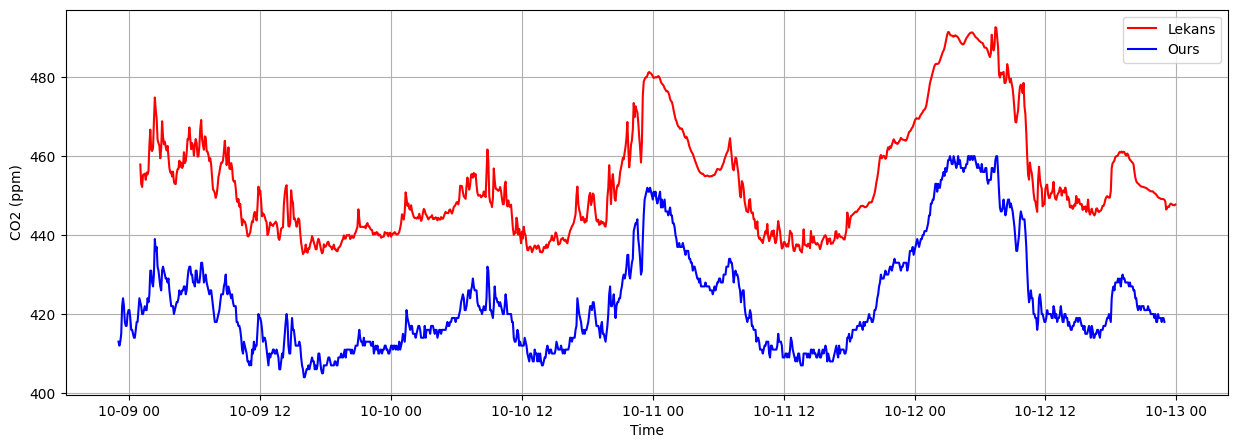

In [ ]:
## Datetime data type conversion
lekancalib  = pd.read_csv(lekancalibpath)

lekancalib['datetime_utc'] = pd.to_datetime(lekancalib['datetime_utc'])
ourcalib = ourcalib[["UTC Date/Time", "CO2 (ppm) raw"]]
ourcalib['UTC Date/Time'] = pd.to_datetime(ourcalib['UTC Date/Time'])
ourcalib['datetime_utc'] = ourcalib['UTC Date/Time']

# Localize the timezone-naive datetime column to UTC
lekancalib['datetime_utc'] = lekancalib['datetime_utc'].dt.tz_localize('UTC')

# Shift calibrated data forward by 1 hour
lekancalib['datetime_utc'] = lekancalib['datetime_utc'] + pd.Timedelta(hours=1)


# Original graphing with one hour shifting of Lekan data

plt.figure(figsize=(15,5))
plt.plot(lekancalib['datetime_utc'], lekancalib['ref_co2_ppm'], color = 'r', label ='Lekans')
plt.plot(ourcalib['UTC Date/Time'], ourcalib['CO2 (ppm) raw'] , color = 'b', label ='Ours')
plt.grid()
plt.ylabel('CO2 (ppm)')
plt.xlabel('Time')
plt.legend()
plt.show()

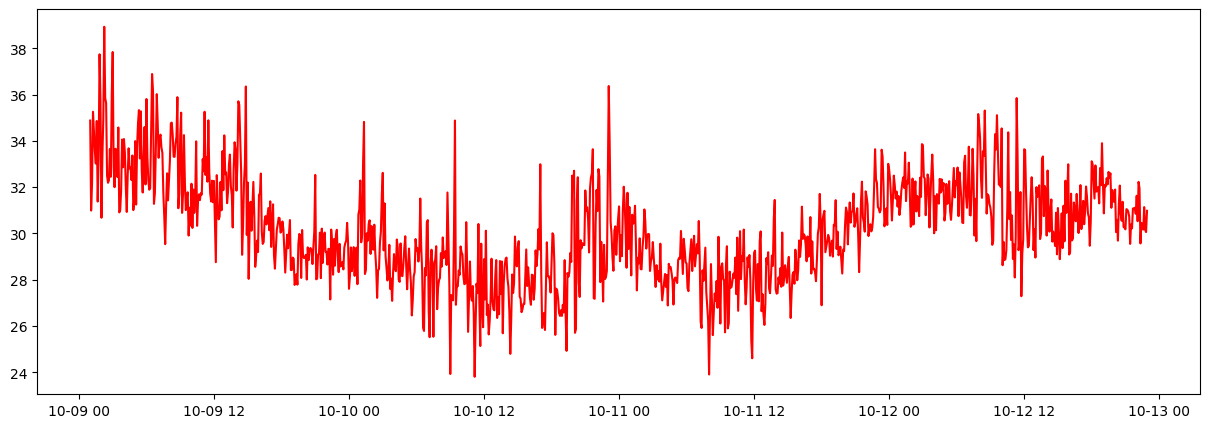

In [ ]:
merge = pd.merge(lekancalib, ourcalib, on='datetime_utc',  how='inner')

plt.figure(figsize=(15,5))
plt.plot(merge['datetime_utc'], merge['ref_co2_ppm'] - merge['CO2 (ppm) raw'], color = 'r', label ='Lekans')


Calibration equation:
ref_CO2 = 1.0511 × raw_CO2 + 8.5049
R² = 0.9786


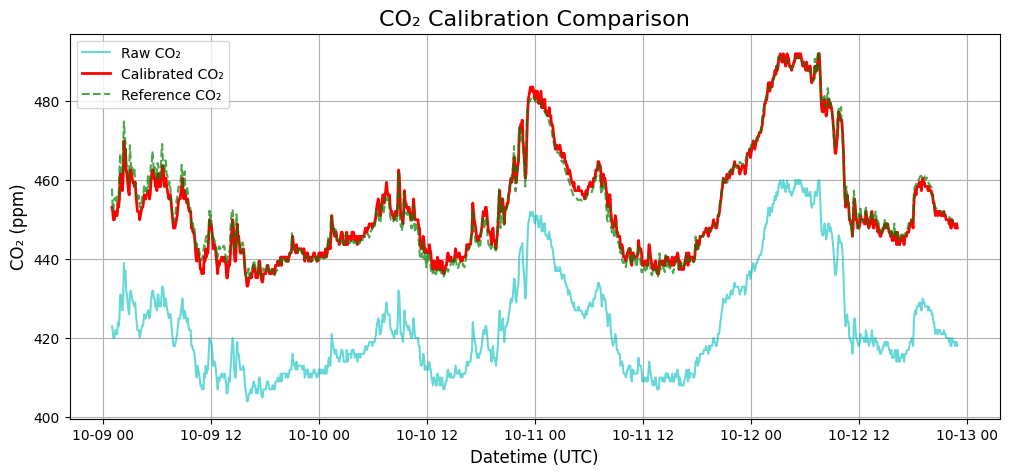

In [ ]:
# Fit calibration model
X = merge[['CO2 (ppm) raw']].values
y = merge['ref_co2_ppm'].values

# Fit linear model
model = LinearRegression().fit(X, y)

a = model.coef_[0]
b = model.intercept_

print(f"Calibration equation:\nref_CO2 = {a:.4f} × raw_CO2 + {b:.4f}")

merge['CO2 (ppm) calibrated'] = merge['CO2 (ppm) raw'] * a + b

r2 = model.score(X, y)
print(f"R² = {r2:.4f}")

plt.figure(figsize=(12,5))
plt.grid()
plt.plot(merge['datetime_utc'], merge['CO2 (ppm) raw']        , label='Raw CO₂'       , color = 'c'  , alpha=0.6)
plt.plot(merge['datetime_utc'], merge['CO2 (ppm) calibrated'] , label='Calibrated CO₂', color = 'r'  , linewidth=2)
plt.plot(merge['datetime_utc'], merge['ref_co2_ppm']          , label='Reference CO₂' , color = 'g'  , linestyle='--', alpha=0.7)
plt.legend()
plt.xlabel('Datetime (UTC)', fontdict = font12)
plt.ylabel('CO₂ (ppm)', fontdict = font12)
plt.title('CO₂ Calibration Comparison', fontdict = font16)
plt.show()